In [19]:
import pandas as pd
import numpy as np

In [20]:
df1=pd.read_csv('diab_dataset_cp/initial_data.csv')

In [21]:
df2=pd.read_csv('diab_dataset_cp/id_map.csv')

In [26]:
df2

,ID mappings for the diabetes dataset,? - always means a missing value
0,admission_type_id,description
1,1,Emergency
2,2,Urgent
3,3,Elective
4,4,Newborn
5,5,Not Available
6,6,NaN
7,7,Trauma Center
8,8,Not Mapped
9,NaN,NaN


In [22]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#df1.loc[df1['diag_1'] == '250.13']
#((df1.readmitted.value_counts())/len(df1))*100

In [23]:
df1.columns

Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age', u'weight',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'payer_code',
       u'medical_specialty', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'diag_1', u'diag_2', u'diag_3',
       u'number_diagnoses', u'max_glu_serum', u'A1Cresult', u'metformin',
       u'repaglinide', u'nateglinide', u'chlorpropamide', u'glimepiride',
       u'acetohexamide', u'glipizide', u'glyburide', u'tolbutamide',
       u'pioglitazone', u'rosiglitazone', u'acarbose', u'miglitol',
       u'troglitazone', u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide-metformin', u'glipizide-metformin',
       u'glimepiride-pioglitazone', u'metformin-rosiglitazone',
       u'metformin-pioglitazone', u'change', u'diabetesMed', u'readmitted'],
      dtype='object')

In [24]:
df1.diabetesMed.value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [7]:
df1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
# del df1['weight'] #got rid of weight columns- has 97% null values
# del df1['payer_code'] #not going to be used for modelling
# df1.loc[df1['discharge_disposition_id'] == 14]

In [10]:
df1.medical_specialty = df1['medical_specialty'].replace('?','missing')

In [11]:
df12 = df1[df1.discharge_disposition_id != 11] #no 11 values
df12=df12[df12.discharge_disposition_id != 13] #no 13 values
df12=df12[df12.discharge_disposition_id != 14] #no 14 values

In [12]:
df12.shape

(99353, 50)

In [76]:
# df12.readmitted = df12['readmitted'].replace('NO','not_readmitted')
# df12.readmitted = df12['readmitted'].replace('>30','not_readmitted')
# df12.readmitted = df12['readmitted'].replace('<30','readmitted')
#df.ix[df.A==0, 'B'] = np.nan

In [17]:
#df12.readmitted.value_counts()

In [18]:
#(df12.readmitted.value_counts()/len(df12))*100

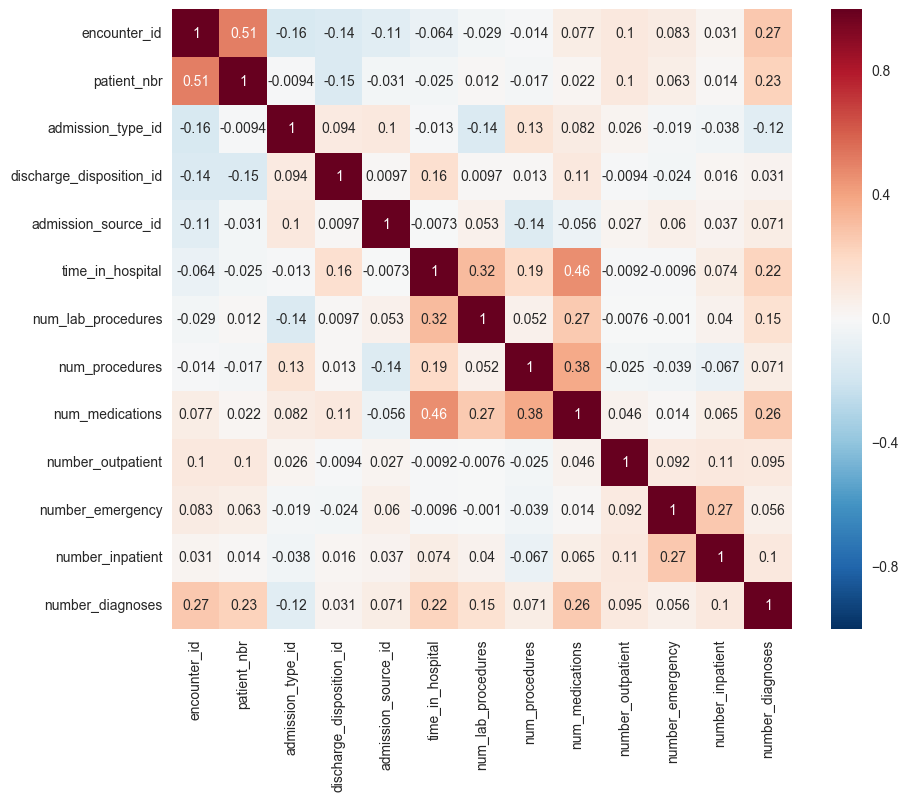

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(df12.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120ba6b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1218e5050>]], dtype=object)

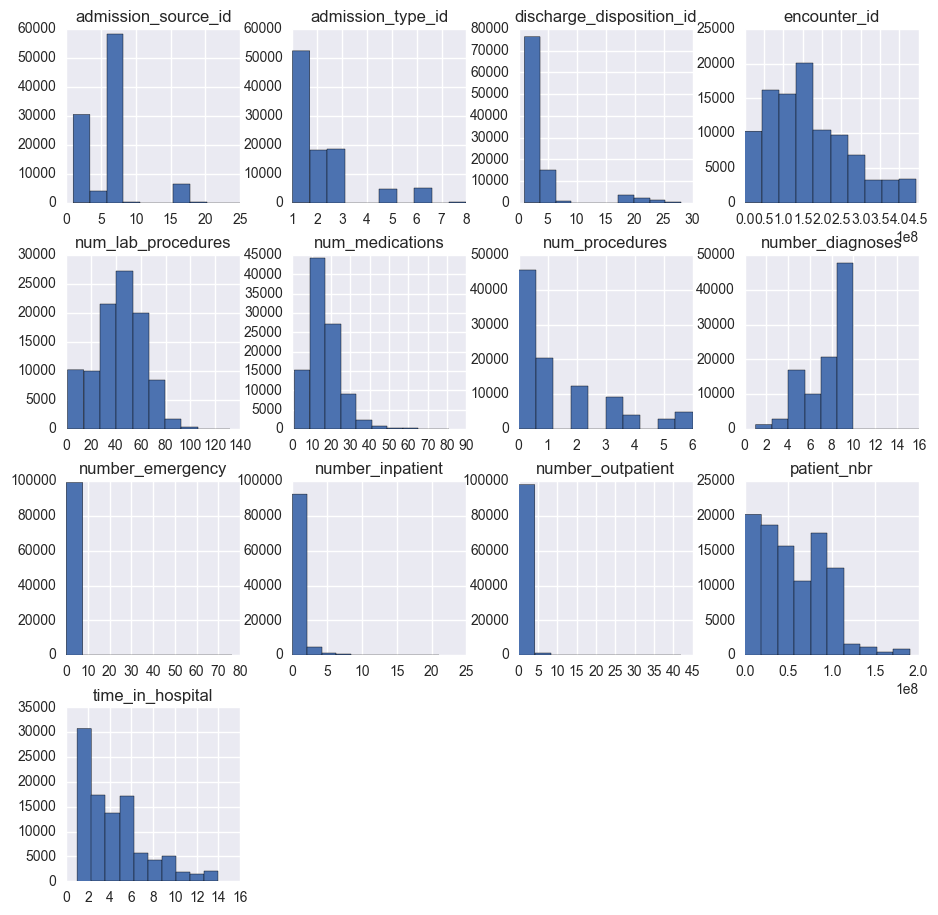

In [20]:
df12[df12.dtypes[(df12.dtypes=="float64")|(df12.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [21]:
# df12.diag_1[250<=df12['diag_1'] <='251']
len(df12[(df12['diag_1'] >= '0') & (df12['diag_1'] <= '249')])

3361

In [22]:
# len(df12[df12['diag_1'] >='251'])

In [23]:
df12.diag_1.value_counts().sum

<bound method Series.sum of 428       6664
414       6550
786       4015
410       3449
486       3383
427       2720
491       2240
715       2147
682       2029
780       2004
996       1937
434       1930
276       1840
250.8     1655
599       1564
38        1497
584       1450
V57       1200
250.6     1177
820       1069
493       1054
577       1046
435       1014
562        985
574        961
518        948
296        895
560        861
250.7      854
250.13     849
          ... 
833          1
832          1
207          1
827          1
911          1
903          1
671          1
906          1
389          1
325          1
640          1
160          1
114          1
10           1
803          1
649          1
448          1
133          1
957          1
955          1
870          1
314          1
318          1
704          1
700          1
974          1
976          1
84           1
817          1
61           1
Name: diag_1, dtype: int64>

In [15]:
pd.crosstab(df12['readmitted'], df12['code1'])#, rownames=['readmitted'])

KeyError: 'code1'

In [14]:
df12.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [25]:
#to run multiple models- webscrape cp
# def model_summary(model, X, y):
#     cv = model_selection.StratifiedKFold(shuffle=True, n_splits=5)
#     scores = model_selection.cross_val_score(model, X, y, cv=cv)
#     print 'mean cross-val accuracy score: ', scores.mean(), "+/-", scores.std()
    
#     y_pred = model_selection.cross_val_predict(model, X, y, cv=cv)
   
#     print metrics.classification_report(y, y_pred)
    
#     y_score = model_selection.cross_val_predict(model, X, y, method='predict_proba')[:,1]
#     fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
#     print 'AUC:', metrics.auc(fpr, tpr)

In [26]:
#feature selection- webscrape cp
# cv = model_selection.KFold(shuffle=True, n_splits=10)
# rfecv = feature_selection.RFECV(linear_model.LogisticRegression(), cv=cv)
# rfecv.fit(X, y)
# cols = rfecv.get_support()
# X2 = X[X.columns[cols]]

# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [27]:
# bins = [0, 139, 249, 251, 279]
# labels=['other','neoplasm1','diabetes','neoplasm2']

In [28]:
# codes = pd.cut(df['diag_1'], bins, labels=labels)
# df12['codes'] = pd.cut(df['diag_1'], bins, labels=labels)

In [29]:
len(df12[df12['diag_1'] <= '249'].iloc[:,])

3361

In [30]:
# df12_neo1=df12[(df12['diag_1'] >= '0') & (df12['diag_1'] <= '249')]
# df12_neo1['code'] = np.where(df12_neo1['diag_1']<='249', 'neoplasm', 'no')

# df12_diab=df12[(df12['diag_1'] >= '250') & (df12['diag_1'] <= '251')]
# df12_diab['code'] = np.where(df12_diab['diag_1']<='251', 'diabetes', 'no')

# df12_neo2=df12[(df12['diag_1'] >= '252') & (df12['diag_1'] <= '279')]
# df12_neo2['code'] = np.where(df12_neo2['diag_1']<='279', 'neoplasm', 'no')

# df12_other1=df12[(df12['diag_1'] >= '280') & (df12['diag_1'] <= '389')]
# df12_other1['code'] = np.where(df12_other1['diag_1']<='389', 'other', 'no')

# df12_circ=df12[(df12['diag_1'] >= '390') & (df12['diag_1'] <= '459')]
# df12_circ['code'] = np.where(df12_circ['diag_1']<='459', 'circulatory', 'no')

# df12_resp=df12[(df12['diag_1'] >= '460') & (df12['diag_1'] <= '519')]
# df12_resp['code'] = np.where(df12_resp['diag_1']<='519', 'respiratory', 'no')

# df12_digest=df12[(df12['diag_1'] >= '520') & (df12['diag_1'] <= '579')]
# df12_digest['code'] = np.where(df12_digest['diag_1']<='579', 'digestive', 'no')

# df12_gu=df12[(df12['diag_1'] >= '580') & (df12['diag_1'] <= '629')]
# df12_gu['code'] = np.where(df12_gu['diag_1']<='629', 'genitourinary', 'no')

# df12_other2=df12[(df12['diag_1'] >= '630') & (df12['diag_1'] <= '679')]
# df12_other2['code'] = np.where(df12_other2['diag_1']<='679', 'other', 'no')

# df12_neo2=df12[(df12['diag_1'] >= '680') & (df12['diag_1'] <= '709')]
# df12_neo2['code'] = np.where(df12_neo2['diag_1']<='709', 'neoplasm', 'no')

# df12_musc=df12[(df12['diag_1'] >= '710') & (df12['diag_1'] <= '739')]
# df12_musc['code'] = np.where(df12_musc['diag_1']<='739', 'musculoskeletal', 'no')

# df12_other3=df12[(df12['diag_1'] >= '740') & (df12['diag_1'] <= '759')]
# df12_other3['code'] = np.where(df12_other3['diag_1']<='759', 'other', 'no')

# df12_neo3=df12[(df12['diag_1'] >= '790') & (df12['diag_1'] <= '799')]
# df12_neo3['code'] = np.where(df12_neo3['diag_1']<='799', 'neoplasm', 'no')

# df12_injury=df12[(df12['diag_1'] >= '800') & (df12['diag_1'] <= '999')]
# df12_injury['code'] = np.where(df12_injury['diag_1']<='999', 'injury', 'no')

In [31]:
# df12_ind = df12[df12.diag_1.isin(['780','781','782','784','785','786','787','788'])]

In [61]:
len(df12[df12['diag_3']=='NAN'])

0

In [16]:
def code(c):
  if c['diag_1'] <= '249':
    return 'neoplasm'
  elif '250' <= c['diag_1'] <= '251':
    return 'diabetes'
  elif '252' <= c['diag_1'] <= '279':
    return 'neoplasm'
  elif '280' <= c['diag_1'] <= '389':
    return 'other'
  elif '390' <= c['diag_1'] <= '459':
    return 'circulatory'
  elif '460' <= c['diag_1'] <= '519':
    return 'respiratory'
  elif '520' <= c['diag_1'] <= '579':
    return 'digestive'
  elif '580' <= c['diag_1'] <= '629':
    return 'genitourinary'
  elif '630' <= c['diag_1'] <= '679':
    return 'other'
  elif '680' <= c['diag_1'] <= '709':
    return 'neoplasm'
  elif '710' <= c['diag_1'] <= '739':
    return 'musculoskeletal'
  elif '740' <= c['diag_1'] <= '759':
    return 'other'
  elif '790' <= c['diag_1'] <= '799':
    return 'neoplasm'
  elif '800' <= c['diag_1'] <= '999':
    return 'injury'
  elif c['diag_1'] in ['780','781','782','784']:
    return 'neoplasm'
  elif c['diag_1'] in ['785']:
    return 'circulatory'
  elif c['diag_1'] in ['786']:
    return 'respiratory'
  elif c['diag_1'] in ['787']:
    return 'digestive'
  elif c['diag_1'] in ['788']:
    return 'genitourinary'
  else:
    return 'Undefined'

df12['code1'] = df12.apply(code, axis=1)

In [17]:
df12.code1.value_counts()

circulatory        29733
respiratory        13977
neoplasm           11049
digestive           9400
diabetes            8676
injury              6928
other               6804
genitourinary       5003
musculoskeletal     4935
Undefined           2848
Name: code1, dtype: int64

In [63]:
def code2(c):
  if c['diag_2'] <= '249':
    return 'neoplasm'
  elif '250' <= c['diag_2'] <= '251':
    return 'diabetes'
  elif '252' <= c['diag_2'] <= '279':
    return 'neoplasm'
  elif '280' <= c['diag_2'] <= '389':
    return 'other'
  elif '390' <= c['diag_2'] <= '459':
    return 'circulatory'
  elif '460' <= c['diag_2'] <= '519':
    return 'respiratory'
  elif '520' <= c['diag_2'] <= '579':
    return 'digestive'
  elif '580' <= c['diag_2'] <= '629':
    return 'genitourinary'
  elif '630' <= c['diag_2'] <= '679':
    return 'other'
  elif '680' <= c['diag_2'] <= '709':
    return 'neoplasm'
  elif '710' <= c['diag_2'] <= '739':
    return 'musculoskeletal'
  elif '740' <= c['diag_2'] <= '759':
    return 'other'
  elif '790' <= c['diag_2'] <= '799':
    return 'neoplasm'
  elif '800' <= c['diag_2'] <= '999':
    return 'injury'
  elif c['diag_2'] in ['780','781','782','784']:
    return 'neoplasm'
  elif c['diag_2'] in ['785']:
    return 'circulatory'
  elif c['diag_2'] in ['786']:
    return 'respiratory'
  elif c['diag_2'] in ['787']:
    return 'digestive'
  elif c['diag_2'] in ['788']:
    return 'genitourinary'
  else:
    return 'Undefined'

df12['code2'] = df12.apply(code2, axis=1)

In [64]:
def code3(c):
  if c['diag_3'] <= '249':
    return 'neoplasm'
  elif '250' <= c['diag_3'] <= '251':
    return 'diabetes'
  elif '252' <= c['diag_3'] <= '279':
    return 'neoplasm'
  elif '280' <= c['diag_3'] <= '389':
    return 'other'
  elif '390' <= c['diag_3'] <= '459':
    return 'circulatory'
  elif '460' <= c['diag_3'] <= '519':
    return 'respiratory'
  elif '520' <= c['diag_3'] <= '579':
    return 'digestive'
  elif '580' <= c['diag_3'] <= '629':
    return 'genitourinary'
  elif '630' <= c['diag_3'] <= '679':
    return 'other'
  elif '680' <= c['diag_3'] <= '709':
    return 'neoplasm'
  elif '710' <= c['diag_3'] <= '739':
    return 'musculoskeletal'
  elif '740' <= c['diag_3'] <= '759':
    return 'other'
  elif '790' <= c['diag_3'] <= '799':
    return 'neoplasm'
  elif '800' <= c['diag_3'] <= '999':
    return 'injury'
  elif c['diag_3'] in ['780','781','782','784']:
    return 'neoplasm'
  elif c['diag_3'] in ['785']:
    return 'circulatory'
  elif c['diag_3'] in ['786']:
    return 'respiratory'
  elif c['diag_3'] in ['787']:
    return 'digestive'
  elif c['diag_3'] in ['788']:
    return 'genitourinary'
  else:
    return 'Undefined'

df12['code3'] = df12.apply(code3, axis=1)

In [65]:
# #to convert the target to a numeric variable
# def readmit(c):
#   if c['readmitted'] == 'not_readmitted':
#     return '0'
  
#   else:
#     return '1'

# df12['readmit'] = df12.apply(readmit, axis=1)

In [69]:
df12.head()
df12.shape

(99353, 53)

In [70]:
# del df12['code']

In [34]:
# df12.to_csv('diab_models.csv')

In [488]:
pd.crosstab(df12['readmit'], df['code'])

code,Undefined,circulatory,diabetes,digestive,genitourinary,injury,musculoskeletal,neoplasm,other,respiratory
readmit,,,,,,,,,,
0,8612,26173,7539,8170,4418,6070,4464,7726,6021,8846
1,994,3464,1137,969,546,858,471,976,783,1116


In [490]:
# X = df12[['gender','age','race','admission_source_id','discharge_disposition_id','code','medical_specialty','time_in_hospital','A1Cresult']]

In [491]:
# y=df12['readmitted']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix 
import patsy
from patsy import dmatrices,dmatrix
from sklearn import model_selection

/Users/user/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
X=dmatrix('~ C(gender)+(age)+ C(race)+(admission_source_id)+(discharge_disposition_id)+C(medical_specialty)+(time_in_hospital)+C(A1Cresult)',df12, return_type='dataframe')

In [30]:
y=df12['readmit'].astype(int)

KeyError: 'readmit'

In [520]:
y.dtype

dtype('int64')

In [451]:
from sklearn.feature_selection import RFECV

estimator = LogisticRegression()
selector = RFECV(estimator, cv=5,step=1)
selector = selector.fit(X,y)
#print selector.get_support()

print selector.support_

X.columns[selector.support_]

RFECVcolumns = X.columns[selector.support_]
print('rfecv:',RFECVcolumns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
('rfecv:', Index([u'Intercept', u'C(gender)[T.Male]', u'C(gender)[T.Unknown/Invalid]',
       u'age[T.[10-20)]', u'age[T.[20-30)]', u'age[T.[30-40)]',
       u'age[T.[40-50)]', u'age[T.[50-60)]', u'age[T.[60-70)]',
       u'age[T.[70-80)]', u'age[T.[80-90)]', u'age[T.[90-100)]',
       u'C(race)[T.AfricanAmerican]', u'C(race)[T.Asian]',
       u'C(race)[T.Caucasian]', u'C(race)[T.Hispanic]', u'C(race)[T.Other]',
     

In [460]:
# y=np.ravel(y)

In [521]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [522]:
model.score(X,y)

0.88612321721538356

In [498]:
coef_df = pd.DataFrame(X.columns)
coef_df.columns=['Variables']
coef_df['Coeff']=pd.Series(model.coef_[0])
coef_df['Odds_ratio_for_survival']=pd.Series(np.exp(model.coef_[0]))
coef_df

,Variables,Coeff,Odds_ratio_for_survival
0,Intercept,-1.579316,0.206116
1,C(gender)[T.Male],0.009290,1.009334
2,C(gender)[T.Unknown/Invalid],-0.215290,0.806308
3,age[T.[10-20)],-0.110272,0.895590
4,age[T.[20-30)],0.646703,1.909237
5,age[T.[30-40)],0.307921,1.360593
6,age[T.[40-50)],0.207542,1.230650
7,age[T.[50-60)],0.092211,1.096596
8,age[T.[60-70)],0.230497,1.259226
9,age[T.[70-80)],0.273087,1.314015


In [559]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
# # to run multiple models
# def model_summary(model, X, y):
#     cv = model_selection.StratifiedKFold(shuffle=True, n_splits=5)
#     scores = model_selection.cross_val_score(model, X, y, cv=cv)
#     print 'mean cross-val accuracy score: ', scores.mean(), "+/-", scores.std()
    
#     y_pred = model_selection.cross_val_predict(model, X, y, cv=cv)
   
#     print metrics.classification_report(y, y_pred)
    
#     y_score = model_selection.cross_val_predict(model, X, y, method='predict_proba')[:,1]
#     fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
#     print 'AUC:', metrics.auc(fpr, tpr)